In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Load your dataset
data = pd.read_csv('CORRELATIONS_YALA_AMPARA.csv')  # Uncomment and modify to load your dataset

In [19]:
# Check the first few rows of the dataset
print(data.head())

   Year  Yala Total Rainfall  Yala Temp Average  Yala Average Of Max Temp  \
0  1993           400.679286          28.412193                 32.390586   
1  1994           331.470000          28.360901                 32.216243   
2  1995           115.068571          29.246930                 33.133860   
3  1996           198.108571          28.890045                 32.804434   
4  1997           493.285714          28.494688                 32.254365   

   Yala Highest Monthly  Average of Max Temp  Yala Average Of Min Temp  \
0                                  33.255238                 25.558743   
1                                  32.824977                 25.526171   
2                                  33.678687                 26.389340   
3                                  35.643871                 26.027697   
4                                  32.796475                 25.750470   

   Yala Lowest Monthly  Average of Min Temp  Actual Yield (kg/ha)  \
0                      

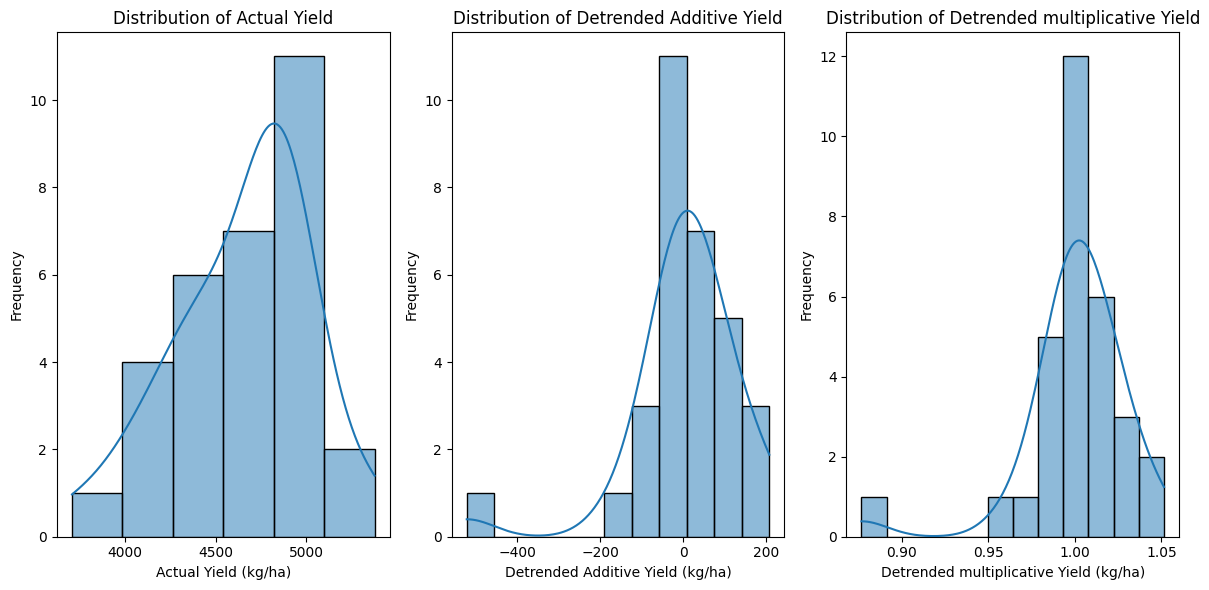

In [20]:
# Distribution plots for Actual Yield and Detrended Yield
plt.figure(figsize=(12, 6))

# Actual Yield Distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Actual Yield (kg/ha)'], kde=True)
plt.title('Distribution of Actual Yield')
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Frequency')

# Detrended Additive Yield Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Detrended Additive (kg/ha)'], kde=True)
plt.title('Distribution of Detrended Additive Yield')
plt.xlabel('Detrended Additive Yield (kg/ha)')
plt.ylabel('Frequency')


# Detrended Additive Yield Distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Detrended Multiplicative (kg/ha)'], kde=True)
plt.title('Distribution of Detrended multiplicative Yield')
plt.xlabel('Detrended multiplicative Yield (kg/ha)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

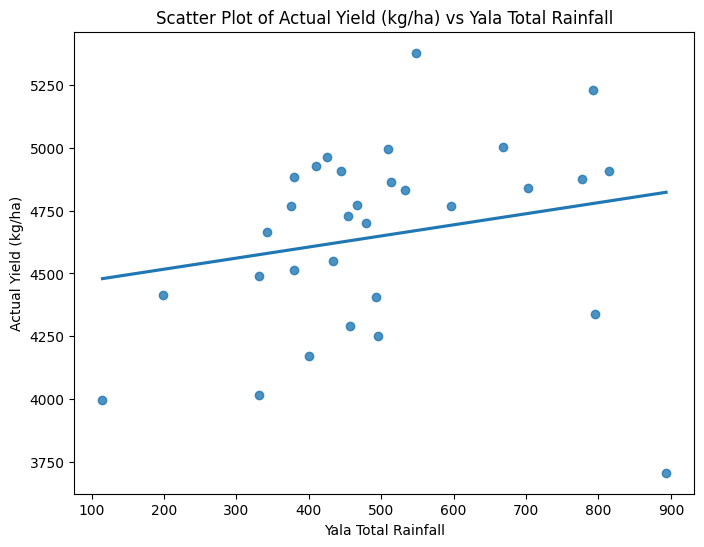

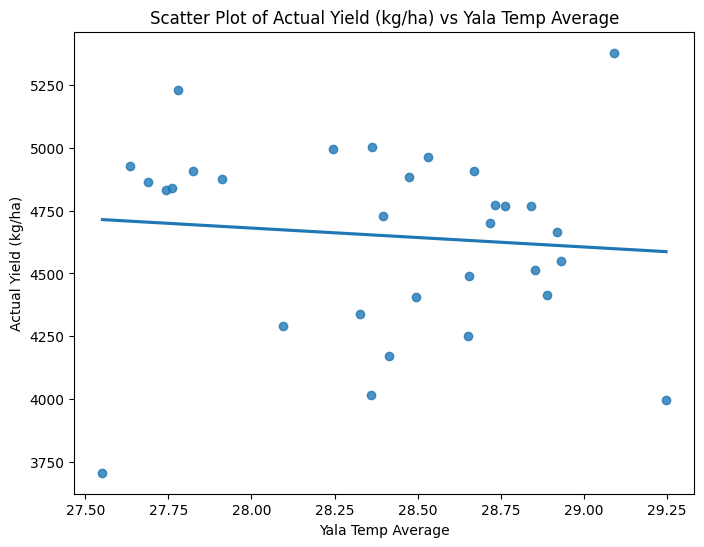

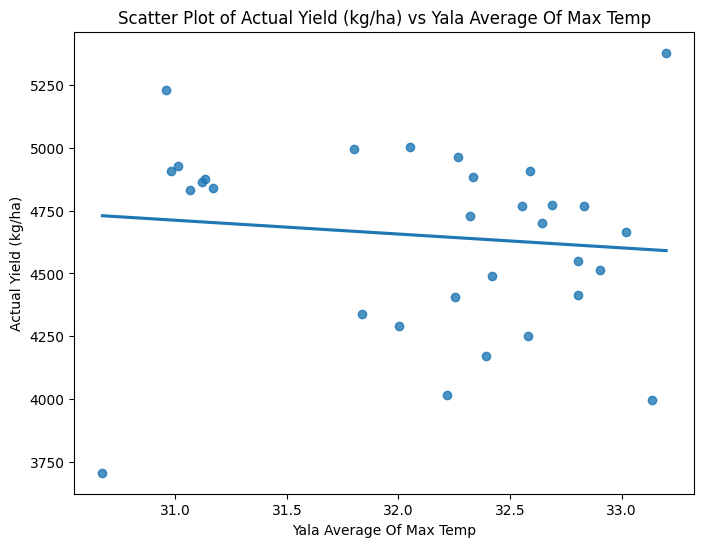

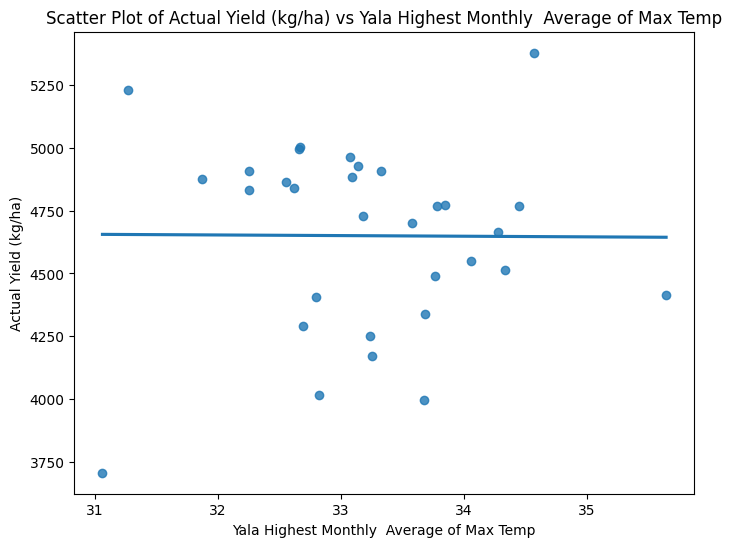

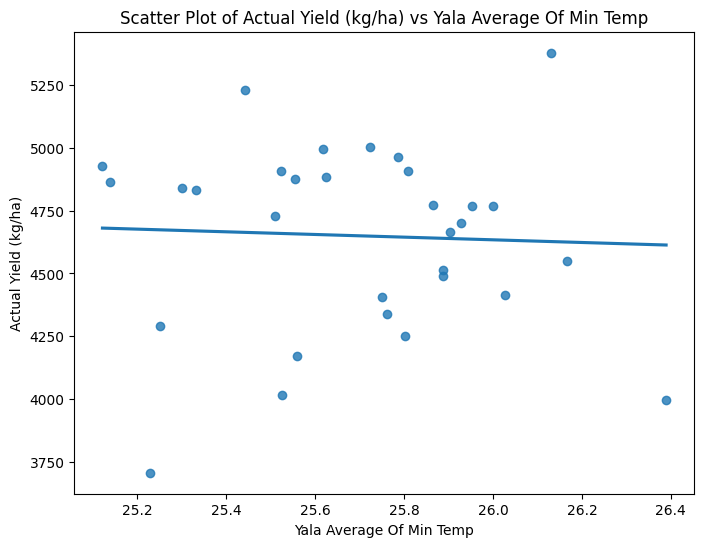

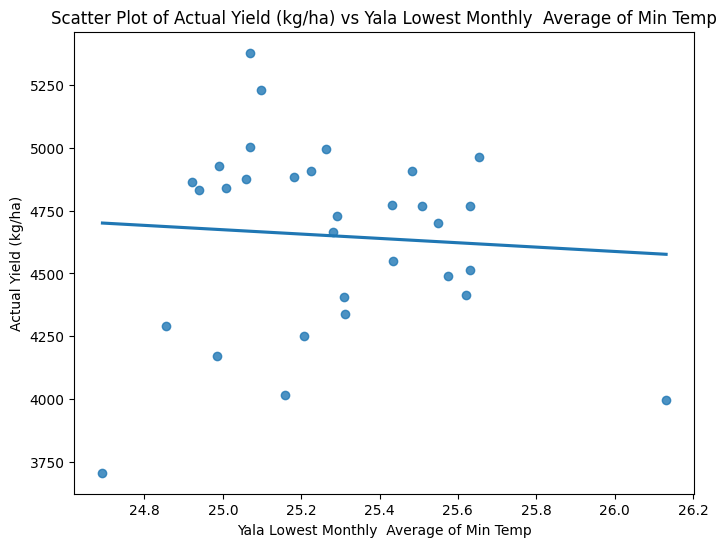

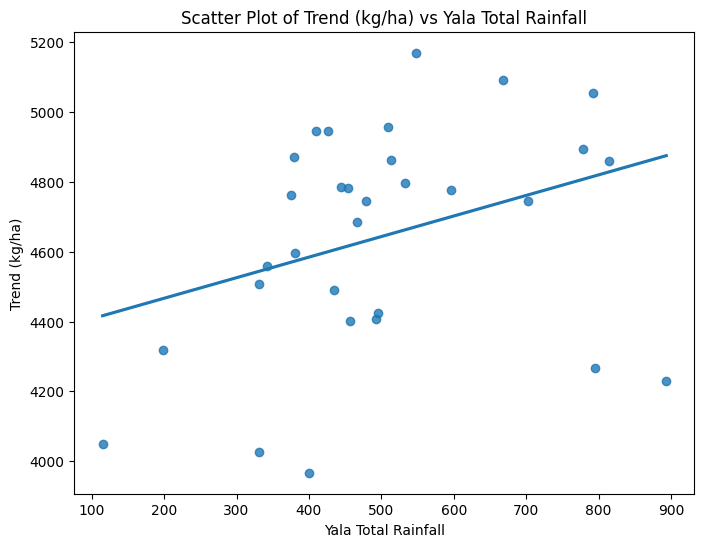

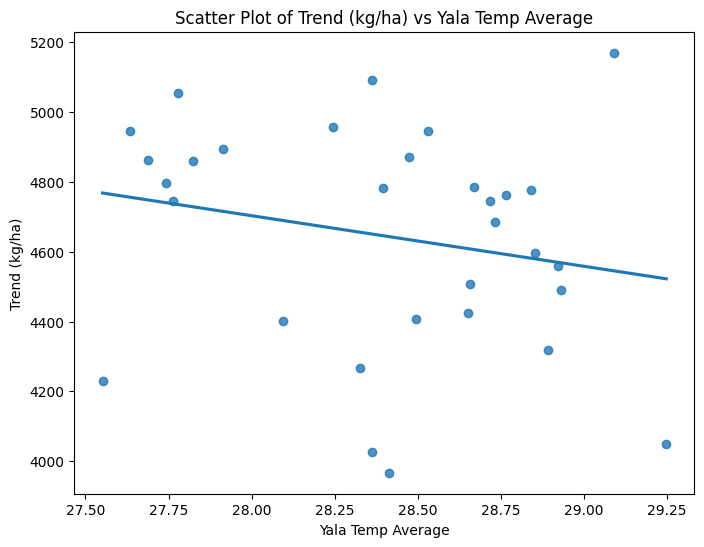

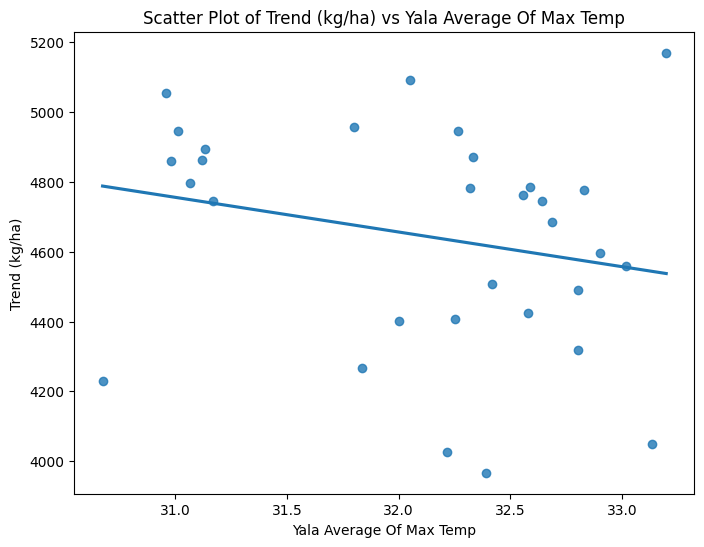

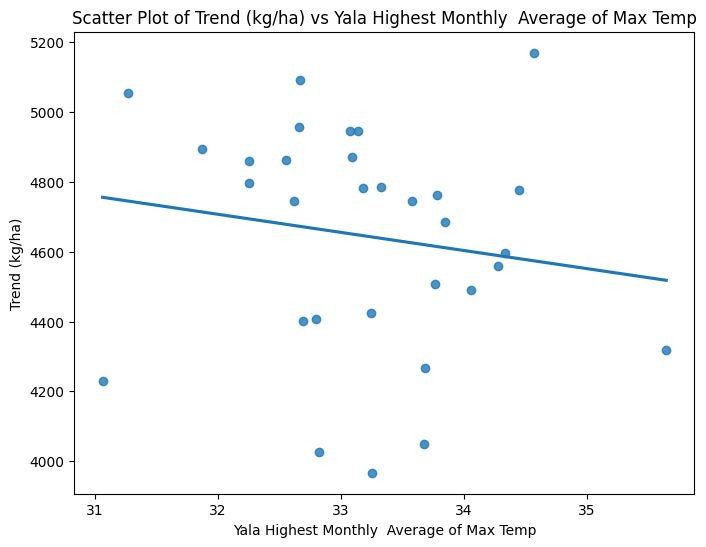

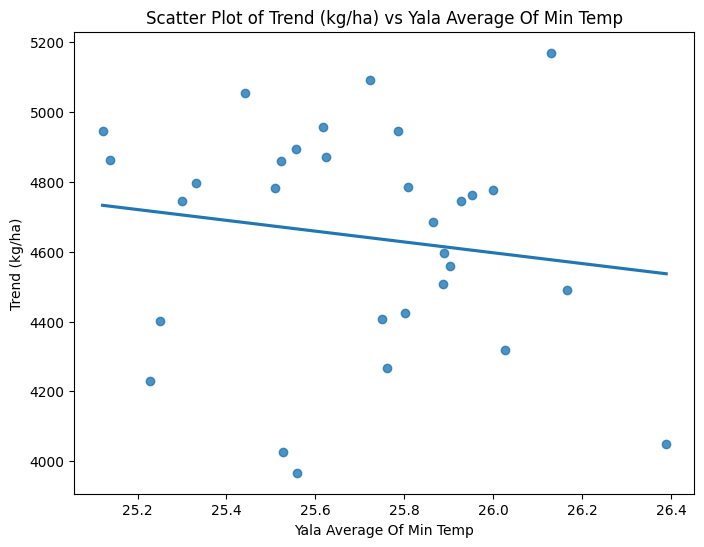

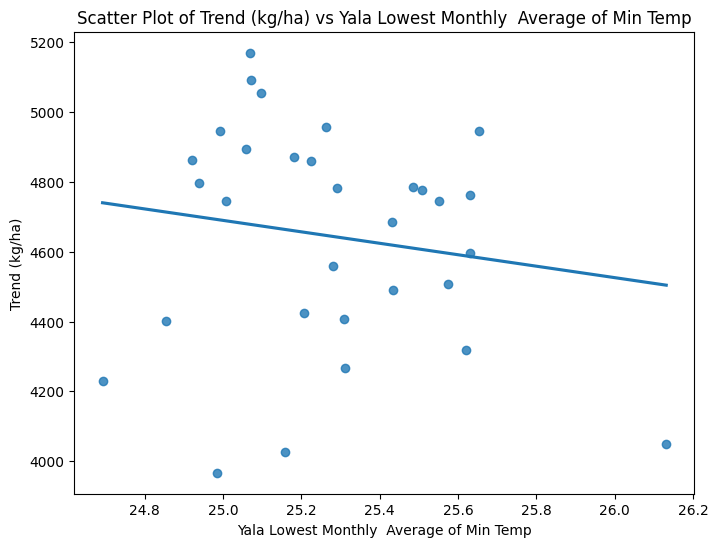

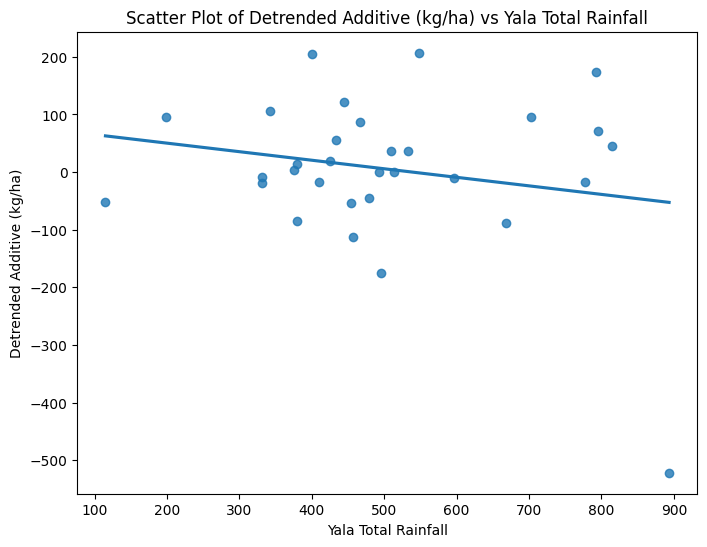

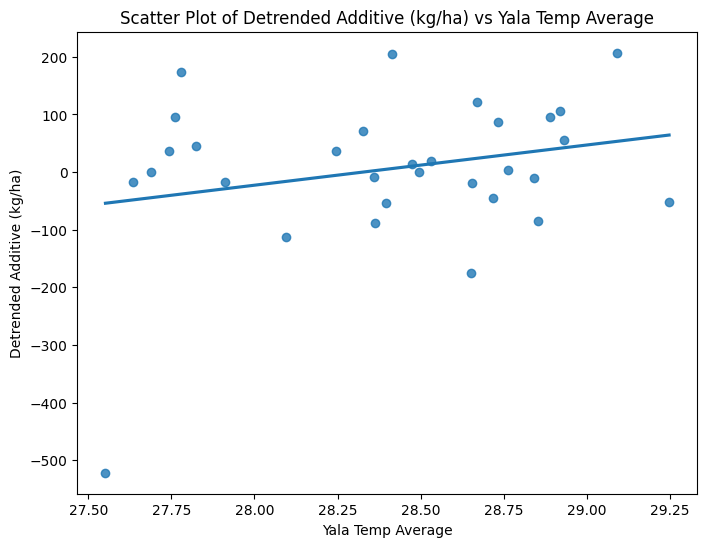

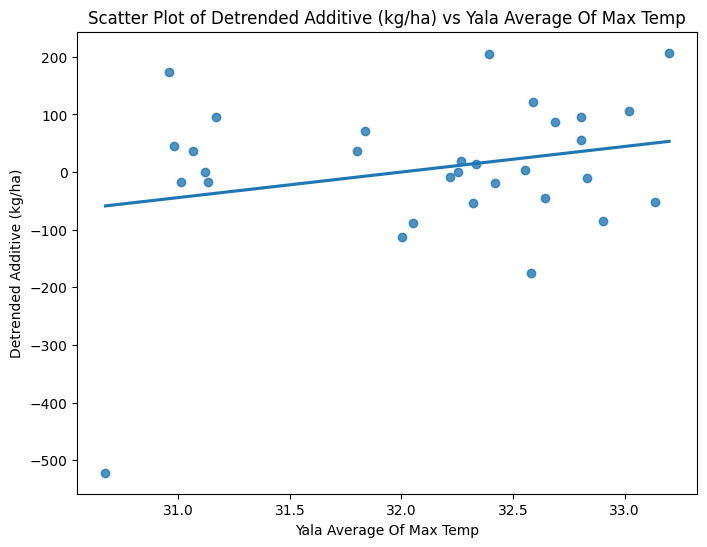

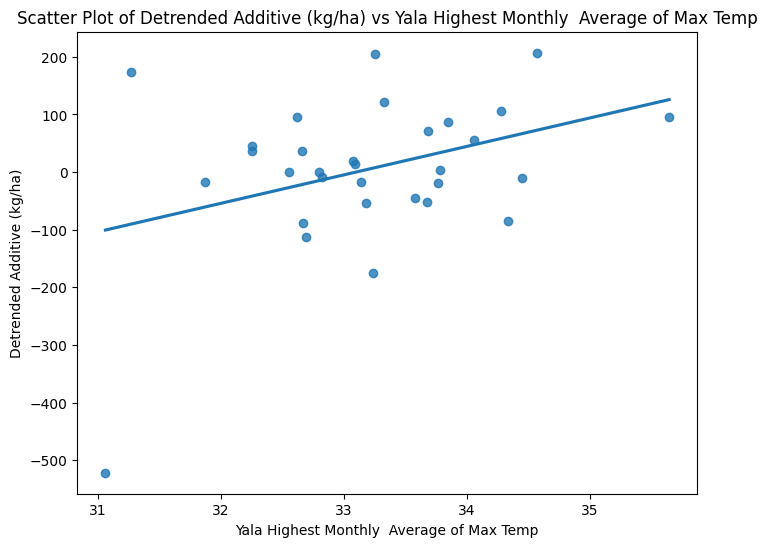

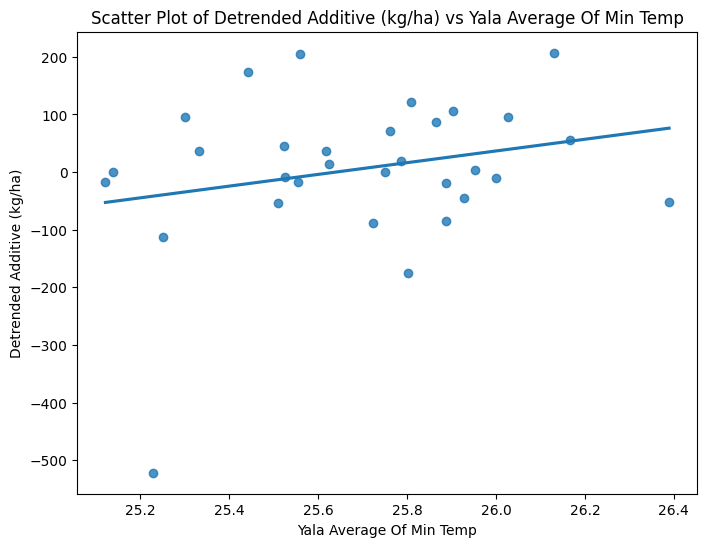

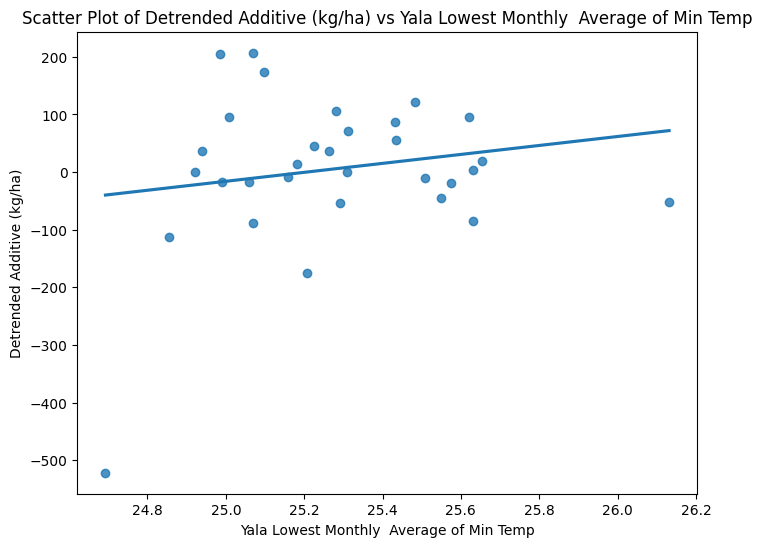

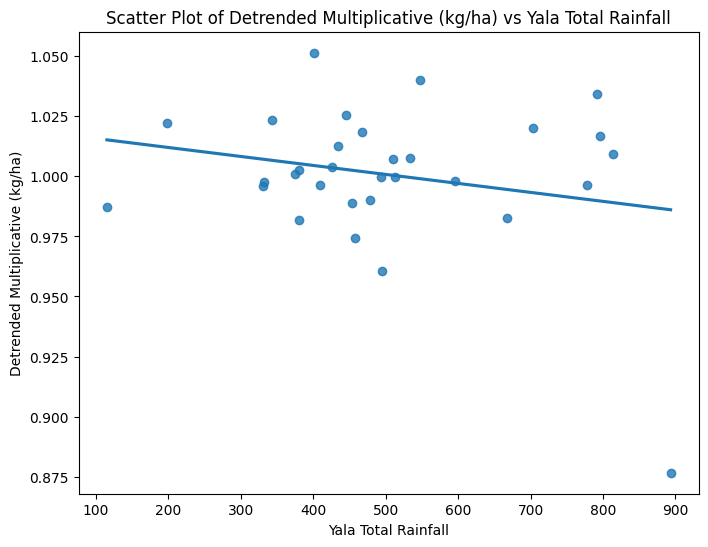

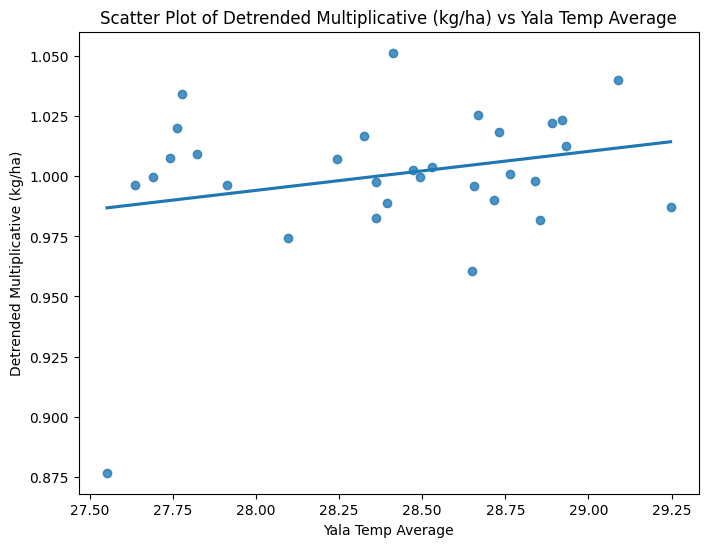

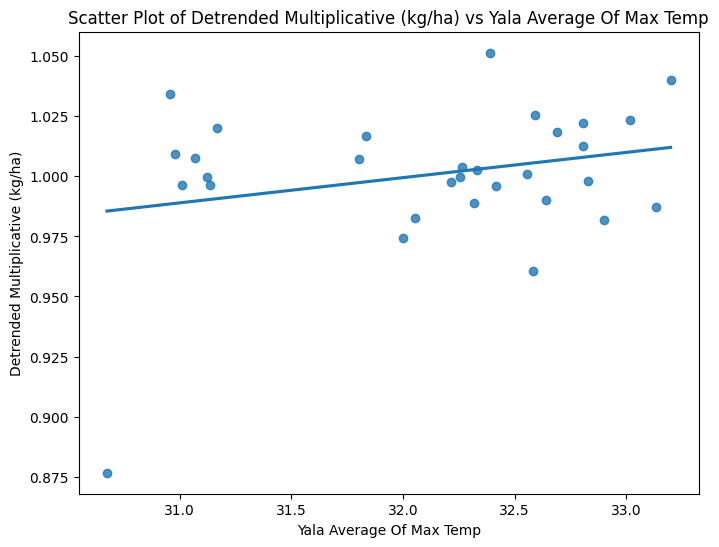

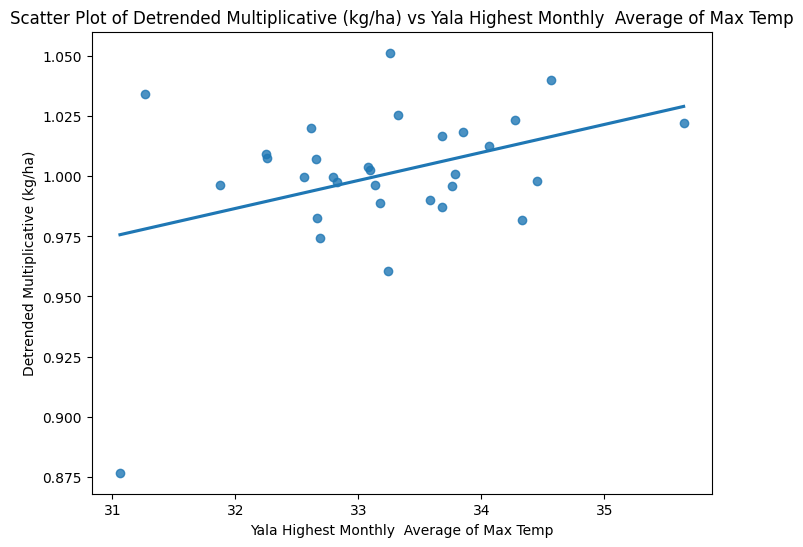

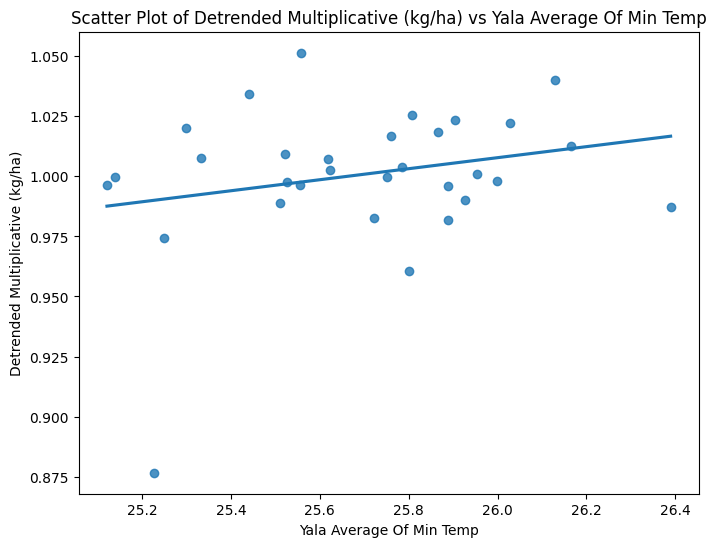

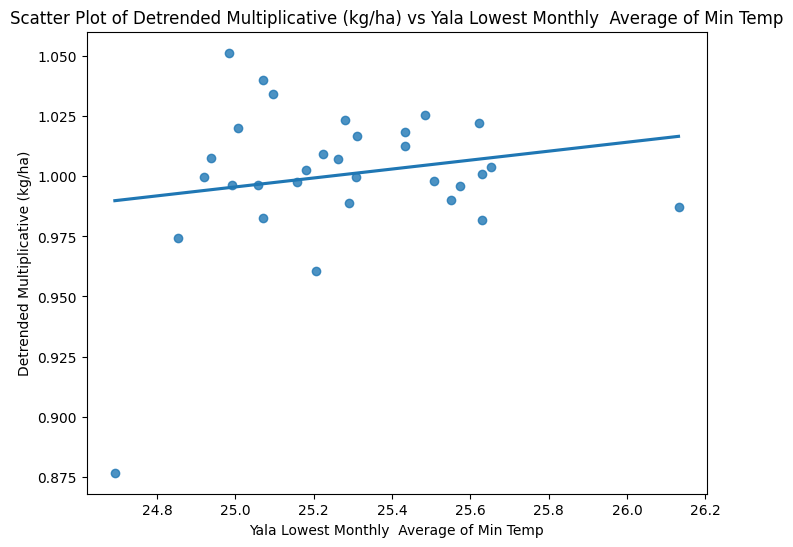

Correlation Matrix:
                                           Yala Total Rainfall  \
Yala Total Rainfall                                   1.000000   
Yala Temp Average                                    -0.640528   
Yala Average Of Max Temp                             -0.685133   
Yala Highest Monthly  Average of Max Temp            -0.641072   
Yala Average Of Min Temp                             -0.463126   
Yala Lowest Monthly  Average of Min Temp             -0.588368   
Actual Yield (kg/ha)                                  0.214189   
Trend (kg/ha)                                         0.333799   
Detrended Additive (kg/ha)                           -0.204594   
Detrended Multiplicative (kg/ha)                     -0.225995   

                                           Yala Temp Average  \
Yala Total Rainfall                                -0.640528   
Yala Temp Average                                   1.000000   
Yala Average Of Max Temp                            0.980068 

In [21]:
# Correlation analysis
weather_columns = ['Yala Total Rainfall', 'Yala Temp Average', 'Yala Average Of Max Temp', 'Yala Highest Monthly  Average of Max Temp','Yala Average Of Min Temp','Yala Lowest Monthly  Average of Min Temp']
yield_columns = ['Actual Yield (kg/ha)',
                 'Trend (kg/ha)',
                 'Detrended Additive (kg/ha)',
                 'Detrended Multiplicative (kg/ha)']

for yield_col in yield_columns:
    for weather_col in weather_columns:
        # Scatter plot with regression line
        plt.figure(figsize=(8, 6))
        sns.regplot(x=data[weather_col], y=data[yield_col], ci=None)
        plt.title(f'Scatter Plot of {yield_col} vs {weather_col}')
        plt.xlabel(weather_col)
        plt.ylabel(yield_col)

        plt.show()

# Optional: Display correlation matrix
correlation_matrix = data[weather_columns + yield_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

In [22]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson's correlation
for var in weather_columns:
    # Replace 'AverageYieldKgPERha' with the correct column name from your dataset
    # Assuming the correct column name is 'Actual Yield (kg/ha)' based on your previous code

    # Drop rows with NaN or inf in the relevant columns before calculating correlation
    valid_data = data[[var, 'Actual Yield (kg/ha)']].dropna().replace([np.inf, -np.inf], np.nan).dropna()

    correlation_coefficient, p_value = pearsonr(valid_data['Actual Yield (kg/ha)'], valid_data[var])
    print(f"Variable: {var}")
    print(f"  Pearson Correlation Coefficient (r): {correlation_coefficient:.2f}")
    print(f"  P-value: {p_value:.4f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"  The correlation is statistically significant (p < {alpha}).")
        if correlation_coefficient > 0:
            print("  Positive linear relationship.")
        else:
            print("  Negative linear relationship.")
    else:
        print(f"  The correlation is not statistically significant (p >= {alpha}).")
    print()

Variable: Yala Total Rainfall
  Pearson Correlation Coefficient (r): 0.21
  P-value: 0.2473
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Temp Average
  Pearson Correlation Coefficient (r): -0.09
  P-value: 0.6112
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Average Of Max Temp
  Pearson Correlation Coefficient (r): -0.11
  P-value: 0.5568
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Highest Monthly  Average of Max Temp
  Pearson Correlation Coefficient (r): -0.01
  P-value: 0.9724
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Average Of Min Temp
  Pearson Correlation Coefficient (r): -0.04
  P-value: 0.8118
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Lowest Monthly  Average of Min Temp
  Pearson Correlation Coefficient (r): -0.07
  P-value: 0.7083
  The correlation is not statistically significant (p >= 0.05).



In [23]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson's correlation
for var in weather_columns:
    # Drop rows with NaN or inf in the relevant columns before calculating correlation
    # Include 'Trend (kg/ha)' in the columns used to create valid_data
    valid_data = data[[var, 'Actual Yield (kg/ha)', 'Trend (kg/ha)']].dropna().replace([np.inf, -np.inf], np.nan).dropna()

    correlation_coefficient, p_value = pearsonr(valid_data['Trend (kg/ha)'], valid_data[var])
    print(f"Variable: {var}")
    print(f"  Pearson Correlation Coefficient (r): {correlation_coefficient:.2f}")
    print(f"  P-value: {p_value:.4f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"  The correlation is statistically significant (p < {alpha}).")
        if correlation_coefficient > 0:
            print("  Positive linear relationship.")
        else:
            print("  Negative linear relationship.")
    else:
        print(f"  The correlation is not statistically significant (p >= {alpha}).")
    print()

Variable: Yala Total Rainfall
  Pearson Correlation Coefficient (r): 0.33
  P-value: 0.0665
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Temp Average
  Pearson Correlation Coefficient (r): -0.21
  P-value: 0.2483
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Average Of Max Temp
  Pearson Correlation Coefficient (r): -0.23
  P-value: 0.2104
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Highest Monthly  Average of Max Temp
  Pearson Correlation Coefficient (r): -0.16
  P-value: 0.3997
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Average Of Min Temp
  Pearson Correlation Coefficient (r): -0.15
  P-value: 0.4155
  The correlation is not statistically significant (p >= 0.05).

Variable: Yala Lowest Monthly  Average of Min Temp
  Pearson Correlation Coefficient (r): -0.16
  P-value: 0.4048
  The correlation is not statistically significant (p >= 0.05).

